# Homework 7: Convex Programming

## 1.Enclosing circle.

Variables: The coordinate of the circle's center; the radius of this circle;   
Objective:$\underset{R}min({\pi} R^2)$  
where R is the radius of the circle;  
Constraints: $(X_i - C)^2 < R^2$  
where C is the center's coordinate of the circle, $X_i$ is the coordinate of the $i_{th}$ point.  


In [1]:
## generate the data points
using PyPlot, JuMP, Gurobi;

num = 50;
X = randn(2,num) .+ 4;

m1 = Model(Gurobi.Optimizer);
set_silent(m1);

C = @variable(m1, [1:2,1:1]); ## circle center
@variable(m1,R2); ## radius's square


for i = 1:num
    @constraint(m1, sum((X[:,i] - C).^2) <= R2);
end

@objective(m1, Min, pi * R2);
optimize!(m1);
    

Academic license - for non-commercial use only
Academic license - for non-commercial use only


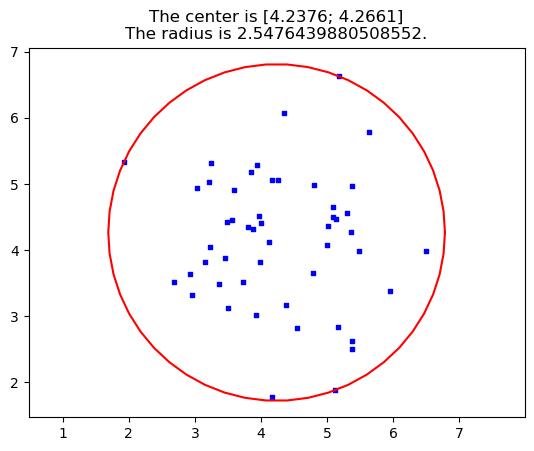

In [2]:
center = value.(C);
radius = (value.(R2))^0.5;

edge = 50;

figure();
scatter(X[1,:],X[2,:], s = 5, marker = "s", c = "blue");
t = (0:1:edge)./edge.*2*pi;
x = center[1] .+ cos.(t) .* radius;
y = center[2] .+ sin.(t) .* radius;
plot(x,y, c = "r");
title( "The center is $(round.(center,digits = 4))\nThe radius is $(radius).")
axis("equal");

## 2. The Huber loss.

### a).

variables: slope, a, and intercept, b  
objective: minimize $\sum_{i}(y_i - ax_i - b_i)^2$

In [3]:
x = 1:15;
y = [6.31 3.78 5.12 1.71 2.99 4.53 2.11 3.88 4.67 26 2.06 23 1.58 2.17 0.02];

X1 = [x';y];
X2 = zeros(2,13);

## generate the data without outliners
i1 = 1;
i2 = 1;
while i1 <= 15
    if (i1 != 10) && (i1 != 12)
        X2[:,i2] = X1[:,i1];
        i2 += 1;
    end
    i1 += 1;    
end

In [4]:
using PyPlot, JuMP,  Gurobi;

m2a = Model(Gurobi.Optimizer);
set_silent(m2a);
#p1 = zeros(2,1); ## linear fit parameters (a and b)
#p2 = zeros(2,1);

ab = @variable(m2a, [1:2,1:1]);

@objective(m2a, Min, sum((X1[2,:] .- X1[1,:].*ab[1] .- ab[2] ).^2));
optimize!(m2a);
p1 = value.(ab);
error1 = JuMP.objective_value(m2a);
@objective(m2a, Min, sum((X2[2,:] .- X2[1,:].*ab[1] .- ab[2] ).^2));
optimize!(m2a);
p2 = value.(ab);
error2 = JuMP.objective_value(m2a);

Academic license - for non-commercial use only
Academic license - for non-commercial use only


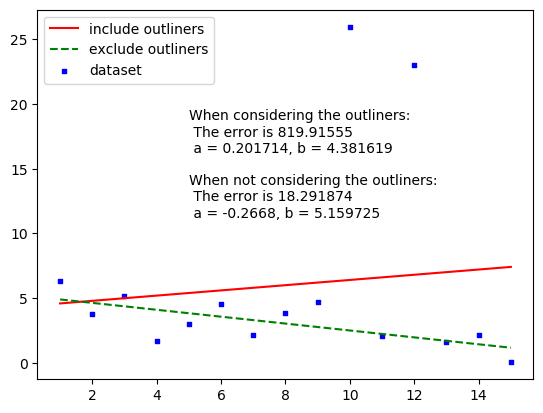

In [5]:
figure();
scatter(X1[1,:], X1[2,:], s = 5, c = "blue", marker = "s", label = "dataset");
plot(X1[1,:], p1[1].*X1[1,:] .+ p1[2], label = "include outliners", c = "r");
plot(X2[1,:], p2[1].*X2[1,:] .+ p2[2], label = "exclude outliners", c = "g", linestyle = "--");
text(5,15, "When considering the outliners:\n The error is $(round.(error1, digits = 6))\n a = $(round.(p1[1],digits = 6)), b = $(round.(p1[2], digits = 6))\n");
text(5,10, "When not considering the outliners:\n The error is $(round.(error2, digits = 6))\n a = $(round.(p2[1],digits = 6)), b = $(round.(p2[2], digits = 6))\n")
legend();

Let's say fit_1 includes the outliners, while fit_2 doesn't. From the plots we can see fit_1 has a positive slope, but fit_2's slope is negative; in the other words, the a in fit_1 is positiv,but in fit_2 is negative;  
The reason for this difference may be that the outliners are very far away from the expected locations. In $l_2$ fit, we minimize the difference in Euclid distance; but the outliners are far away, so their contribution to the objective is much greater than other points when squared. Thus we get a positive a value, even though the other data shows a decreasing trend.

### b).

variables: slope, a, and intercept, b  
objective: minimize $\sum_{i}|y_i - ax_i - b_i|$

In [6]:
m2b = Model(Gurobi.Optimizer);
set_silent(m2b);

## p3 as l1 fit

ab = @variable(m2b, [1:2,1:1]);
t = @variable(m2b, [1:length(X1[1,:])]);
@constraint(m2b, t .>= (X1[2,:] .- X1[1,:].*ab[1] .- ab[2] ) );
@constraint(m2b, t .>= -(X1[2,:] .- X1[1,:].*ab[1] .- ab[2] ) );
@objective(m2b, Min, sum(t));
optimize!(m2b);
p3 = value.(ab);
error3 = JuMP.objective_value(m2b);


Academic license - for non-commercial use only
Academic license - for non-commercial use only


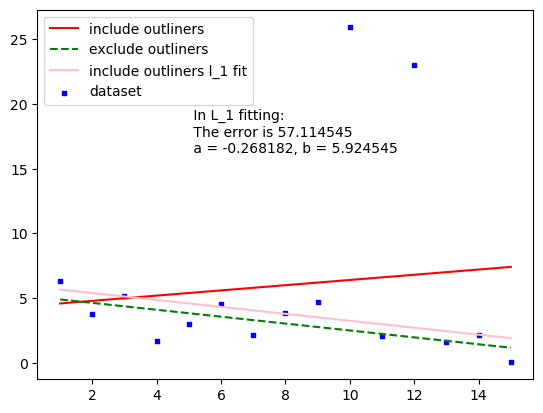

In [7]:
figure();
scatter(X1[1,:], X1[2,:], s = 5, c = "blue", marker = "s", label = "dataset");
plot(X1[1,:], p1[1].*X1[1,:] .+ p1[2], label = "include outliners", c = "r");
plot(X2[1,:], p2[1].*X2[1,:] .+ p2[2], label = "exclude outliners", c = "g", linestyle = "--");
plot(X1[1,:], p3[1].*X1[1,:] .+ p3[2], label = "include outliners l_1 fit", c = "pink");
text(5,15, " In L_1 fitting:\n The error is $(round.(error3, digits = 6))\n a = $(round.(p3[1],digits = 6)), b = $(round.(p3[2], digits = 6))\n");

legend();

From this figure we can see $l_1$ fit is better than $l_2$ fit when including the outliners, as the slope is almost the same as the $l_2$ fitting without outliners, and the only difference is the intercept, but not significant.  
The reason may be that, in $l_1$ fit, the contribution from the outliners are still large, but not as significant as in $l_2$ fit, where their contributions are squared. So a few outliners will not affect the linear fitting greatly in $l_1$ approach.

### c).

variables: slope, a, and intercept, b  
objective: minimize $\sum_i\phi(y_i - ax_i - b)$

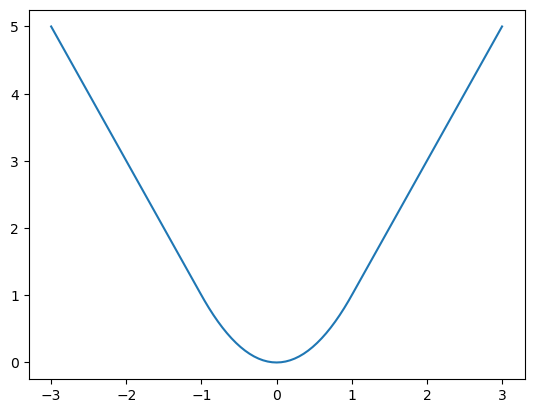

Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [8]:
using PyPlot, JuMP,  Gurobi;

function Huber_loss(M, x)
    m_Huber = Model(Gurobi.Optimizer);
    set_silent(m_Huber);
    @variable(m_Huber, w <= M);
    @variable(m_Huber, v >= 0);
    @constraint(m_Huber, w + v >= x);
    @constraint(m_Huber, w + v >= -x);
    @objective(m_Huber, Min, w^2 + 2*M*v);
    optimize!(m_Huber);
    return JuMP.objective_value(m_Huber);
end

function Huber_loss_array(M, x)
    m_Huber = Model(Gurobi.Optimizer);
    set_silent(m_Huber);
    w = @variable(m_Huber,[1:length(x)]);
    v = @variable(m_Huber,[1:length(x)]);
    t = @variable(m_Huber,[1:length(x)]);
    @constraint(m_Huber, w .<= M);
    @constraint(m_Huber, v .>= 0);
    @constraint(m_Huber, w + v .>= x);
    @constraint(m_Huber, w + v .>= -x);
    @constraint(m_Huber, t.>= w.^2 .+ 2 .*M.*v);
    @objective(m_Huber, Min, sum(t));
    optimize!(m_Huber);
    return value.(t);
end

M = 1;

X_verify_m = 50;
X_verify = ((-X_verify_m:1:X_verify_m))./X_verify_m ;
X_verify = X_verify .*3;

Y_verify =  Huber_loss_array(M, X_verify);

#=
Y_verify = zeros(length(X_verify), 1);
for i = 1:length(Y_verify)
    Y_verify[i] = Huber_loss(M, X_verify[i]);
end
=#
figure();
plot(X_verify, Y_verify);

Ans:  
So we can see this $\phi(x)$ corresponds to the analytical expression in this question. We can see these two plots are exactly the same.

variables: $w,v,a,b$  
constraints: $w_i \le M, v_i\ge 0, w_i + v_i \ge |y_i - ax_i -b|$  
objective: Minimize $\sum_i w_i^2 + 2Mv_i$

In [9]:

m2c = Model(Gurobi.Optimizer);
set_silent(m2c);
ab = @variable(m2c, [1:2,1:1]);
cost = @variable(m2c, [1:length(X1[1,:])]);
w = @variable(m2c, [1:length(X1[1,:])]);
v = @variable(m2c, [1:length(X1[1,:])]);

@constraint(m2c, (w .+ v) .>= (X1[2,:] .- X1[1,:].*ab[1] .- ab[2]));
@constraint(m2c, (w .+ v) .>= -(X1[2,:] .- X1[1,:].*ab[1] .- ab[2]));
@constraint(m2c, v .>= 0);
@constraint(m2c, w .<= M);
@constraint(m2c, cost .>= w.^2 + (2 * M) .* v);

@objective(m2c, Min, sum(cost));
optimize!(m2c);
p4 = value.(ab);
error4 = JuMP.objective_value(m2b);

Academic license - for non-commercial use only
Academic license - for non-commercial use only


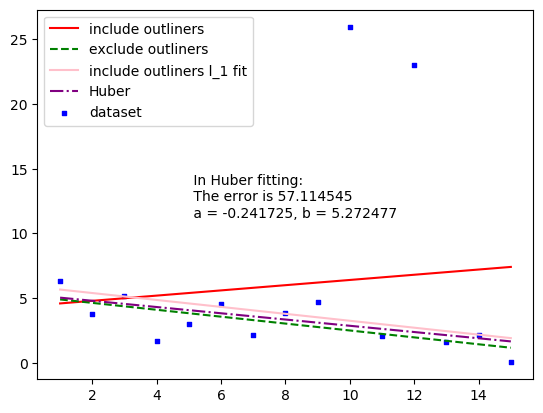

In [10]:
figure();
scatter(X1[1,:], X1[2,:], s = 5, c = "blue", marker = "s", label = "dataset");
plot(X1[1,:], p1[1].*X1[1,:] .+ p1[2], label = "include outliners", c = "r");
plot(X2[1,:], p2[1].*X2[1,:] .+ p2[2], label = "exclude outliners", c = "g", linestyle = "--");
plot(X1[1,:], p3[1].*X1[1,:] .+ p3[2], label = "include outliners l_1 fit", c = "pink");
plot(X1[1,:], p4[1].*X1[1,:] .+ p4[2], label = "Huber", c = "purple", linestyle = "-.");
text(5,10, " In Huber fitting:\n The error is $(round.(error4, digits = 6))\n a = $(round.(p4[1],digits = 6)), b = $(round.(p4[2], digits = 6))\n");

legend();

## 3.Heat pipe design.

### a).

The velocity of the heat flow is $v = \alpha_4Tr^2$, so the amout of heat transferring in this tube is $\pi r^2 v = \pi\alpha_4Tr^4$  
Convert this question into a geometric form, we thus have:  
$max  \quad{\pi\alpha_4Tr^4}$  
$s.t \quad T_{min} \le T \le T_{max}$  
$\quad\quad r_{min} \le r \le r_{max}$  
$\quad\quad w_{min} \le w \le w_{max}$    
$\quad\quad w \le 0.1r$  
$\quad\quad \alpha_1\frac{Tr}{w} + \alpha_2r + \alpha_3rw \le C_{max}$

Then we can convert it to a generic form;  
$ -min \quad (-\pi\alpha_4Tr^4 )$ 
$s.t \quad \frac{T_{min}}{T} \le 1 \quad \frac{T}{T_{max}} \le 1$  
$\quad\quad \frac{r_{min}}{r} \le 1 \quad \frac{r}{r_{max}} \le 1$  
$\quad\quad \frac{w_{min}}{w} \le 1 \quad \frac{w}{w_{max}} \le 1 $  
$\quad\quad \frac{10w}{r} \le 1 $  
$\quad\quad \frac{\alpha_1\frac{Tr}{w} + \alpha_2r + \alpha_3rw}{ C_{max}} \le 1$

When apply logarithm on all the constriants, we have a convex optimization:  
$ min \quad - \log{\pi\alpha_4} - \log{T} - 4\log{r}$  
$s.t \quad \log{T_{min}} - \log{T} \le 0 \quad \log{T} - \log{T_{max}} \le 0 $  
$\quad\quad \log{r_{min}} - \log{r} \le 0 \quad \log{r} - \log{r_{max}} \le 0 $  
$\quad\quad \log{w_{min}} - \log{w} \le 0 \quad \log{w} - \log{w_{max}} \le 0 $  
$\quad\quad \log{10} + \log{w} - \log{r} \le 0 $  
$\quad\quad \log{\frac{\alpha_1 e ^ {\log{T} + \log{r} - \log{w}} + \alpha_2 e^{\log{r}} + \alpha_3 e^{\log{r} + \log{w}}}{ C_{max}}} \le 0$

## b).

Assume we have $x = \log{T}, y = \log{r}, z = \log{w}$  
$\alpha_i = 1 \quad _{\forall i \in \{1,2,3,4\}}$  
$C_{max} = 500$  
Hence we have:  
$
min \quad - \log{\pi} - x - 4y $  
$s.t 
\quad\quad \log{10} + z - y \le 0 $  
$\quad\quad \log{\frac{e ^ {x + y - z} + e^{y} + e^{y + z}}{ 500}} \le 0$


In [11]:
using JuMP, Ipopt,PyPlot;
m3 = Model(Ipopt.Optimizer);
set_silent(m3);
@variable(m3, x);
@variable(m3, y);
@variable(m3, z);

@constraint(m3, log(10) + z - y <= 0);
@NLconstraint(m3, log((exp(x+y-z) + exp(y) + exp(y+z))/500) <= 0);
@objective(m3, Min, -log(pi) - x - 4*y);
optimize!(m3);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equ

In [12]:
T = exp(value.(x));
r = exp(value.(y));
w = exp(value.(z));
Heat_max = pi * T * r^4;
print("The maximum heat flow in this pip is $(Heat_max), \nwhere T = $(T),r = $(r), w = $(w).\n");
print("The cost is $(T*r/w + r + r*w).")

The maximum heat flow in this pip is 3.0679616908019958e9, 
where T = 0.24999999951949164,r = 250.0000024635135, w = 0.4999999993593595.
The cost is 500.0000046867728.